In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from math import sqrt
from random import randrange
print('Successfully imported libraries!')

Successfully imported libraries!


In [3]:
datapath = "Iris.csv"
df = pd.read_csv(datapath)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset = df.drop(columns=['Classes'])
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# count number of examples of different classes
y = df['Classes'].values
pd.value_counts(y)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

There are 3 classes in this set. Namely Iris-setosa, Iris-virginica and Iris-versicolor. There are 50 examples of each class. Hence this is a balanced dataset.

In [6]:
dataset.max()

Sepal_Length    7.9
Sepal_Width     4.4
Petal_Length    6.9
Petal_Width     2.5
dtype: float64

In [7]:
dataset.min()

Sepal_Length    4.3
Sepal_Width     2.0
Petal_Length    1.0
Petal_Width     0.1
dtype: float64

Those are the maximum and minimum values of the columns.

<function matplotlib.pyplot.show(close=None, block=None)>

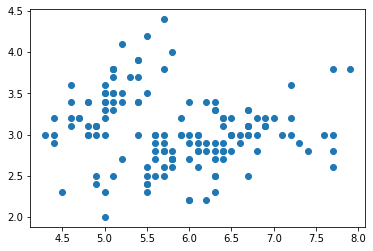

In [8]:
# scatter plot sepal length and sepal width
plt.scatter(dataset['Sepal_Length'], dataset['Sepal_Width'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

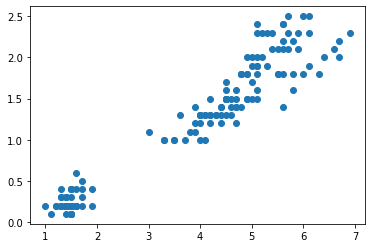

In [9]:
# scatter plot petal length and petal width
plt.scatter(dataset['Petal_Length'], dataset['Petal_Width'])
plt.show

Above are the scatterplots

Linear Regression for Sepal Length and Sepal Width

In [10]:
# Linear Regression
sepal_X_data = []
sepal_y_data = []
for index, rows in df.iterrows():
    myList = [index, df.Sepal_Length[index]]
    sepal_X_data.append(myList)
    myList2 = [index, df.Sepal_Width[index]]
    sepal_y_data.append(myList2)

In [11]:
reg = LinearRegression().fit(sepal_X_data, sepal_y_data)
reg.score(sepal_X_data, sepal_y_data)

0.6108198188243351

Linear Regression for Petal Length and Petal Width

In [12]:
# Linear Regression
petal_X_data = []
petal_y_data = []
for index, rows in df.iterrows():
    myList = [index, df.Petal_Length[index]]
    petal_X_data.append(myList)
    myList2 = [index, df.Petal_Width[index]]
    petal_y_data.append(myList2)

In [13]:
reg = LinearRegression().fit(petal_X_data, petal_y_data)
reg.score(petal_X_data, petal_y_data)

0.9690874542802709

Since the Petal length vs Petal Width has a higher R^2 value the linear regression is a better fit there.

In [14]:
# randomizing dataset
df_rand = df.sample(frac=1, random_state=123).reset_index(drop=True)
y = df_rand['Classes'].values

df_list = df_rand.values.tolist()

X_rand = df_rand.drop(columns=['Classes'])

In [15]:
# distance function
# accepts two n-dimensional vectors, computes distance and returns it
def euclidean_dist(a, b):
    dist = (a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2 + (a[3]-b[3])**2
    return sqrt(dist)

In [16]:
# Get the nearest neighbors
def get_nn(train_set, test_vector, k):
    distances = []
    for train_vector in train_set:
        dist = euclidean_dist(train_vector, test_vector)
        distances.append((train_vector, dist))
    # sorting the list by distance
    distances.sort(key=lambda pick: pick[1])
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors

In [17]:
# make prediction
def predict(train_set, test_vector, k):
    neighbors = get_nn(train_set, test_vector, k)
    output_vals = []
    for neighbor in neighbors:
        output_vals.append(neighbor[4])
    prediction = max(set(output_vals), key=output_vals.count)
    return prediction

In [18]:
# Splitting the dataset using five folds
def fold_split(df_list, n=5):
    folds = []
    df_list_copy = list(df_list)
    
    fold_len = len(df_list)/n
    for i in range(n):
        fold = []
        while len(fold) < fold_len:
            # pop the first element of the df_list
            # since the list is already randomized we can just pick the first element of the list to pop.
            fold.append(df_list_copy.pop(0))
        folds.append(fold)
    return folds

In [19]:
def measure_accuracy(pred, real):
    success = 0
    for i in range(len(pred)):
        if pred[i] == real[i]:
            success += 1
    return float(success / len(pred))

In [20]:
def check(df_list, n):
    idx = 0
    folds = fold_split(df_list, n)
    scores = []
    track = [[],[],[],[]]
    k_list = [1, 3, 5, 7]
    for k in k_list:
        success_count_sum = 0
        for fold in folds:
            train_set = list(folds)
            train_set.remove(fold)
            train_set = sum(train_set, [])
            success_count = 0
            for test_vector in fold:
                predicted = predict(train_set, test_vector, k)
                if predicted == test_vector[-1]:
                    success_count += 1
            success_count_sum += success_count
            track[idx].append(float(success_count/30)*100)
        scores.append((success_count_sum/150)*100)
        idx += 1
    # print(track)
    return scores

In [21]:
scores = check(df_list, 5)
print("k=1 (average value): " + str(scores[0]))
print("k=3 (average value): " + str(scores[1]))
print("k=5 (average value): " + str(scores[2]))
print("k=7 (average value): " + str(scores[3]))

k=1 (average value): 95.33333333333334
k=3 (average value): 96.0
k=5 (average value): 96.0
k=7 (average value): 96.66666666666667
